#Install library

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 49.7 MB/s 


#Import library

In [ ]:
from livelossplot import PlotLossesKerasTF
from keras.datasets import mnist
#%config Completer.use_jedi = False
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
import tensorflow as tf
#Train the model
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
#config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Collect Data

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train / 255.
X_test  = X_test  / 255.    # standardize the data for train and test to be between 0-1

### Convert Output label to multiple values

In [ ]:
# one hot encoding outcome
target_train = to_categorical(Y_train)
target_test  = to_categorical(Y_test)

# Build the Graph

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Conv2D, Conv2DTranspose, Conv1D, MaxPool2D, Flatten
from tensorflow.keras import Model

In [ ]:
target_train.shape

(60000, 10)

In [ ]:
input_img = Input(shape=(10),
#    batch_size=100,
    name="test",
    dtype=np.float32,
    )

In [ ]:
dense_layer = Dense(128, activation="relu")(input_img)
dense_layer = Dense(256, activation="relu")(dense_layer)
dense_layer = Dense(512, activation="relu")(dense_layer)
decoder       = Dense(784, activation="sigmoid")(dense_layer)
decoder       = Reshape((28, 28, 1), input_shape=(784,))(decoder)

In [ ]:
decoder_model = Model(input_img, decoder)

In [ ]:
decoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 test (InputLayer)           [(None, 10)]              0         
                                                                 
 dense_3 (Dense)             (None, 128)               1408      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 dense_6 (Dense)             (None, 784)               402192    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 568,208
Trainable params: 568,208
Non-trainab

In [ ]:
decoder_model.compile(optimizer='adam',
              loss='mse', metrics=['accuracy'])

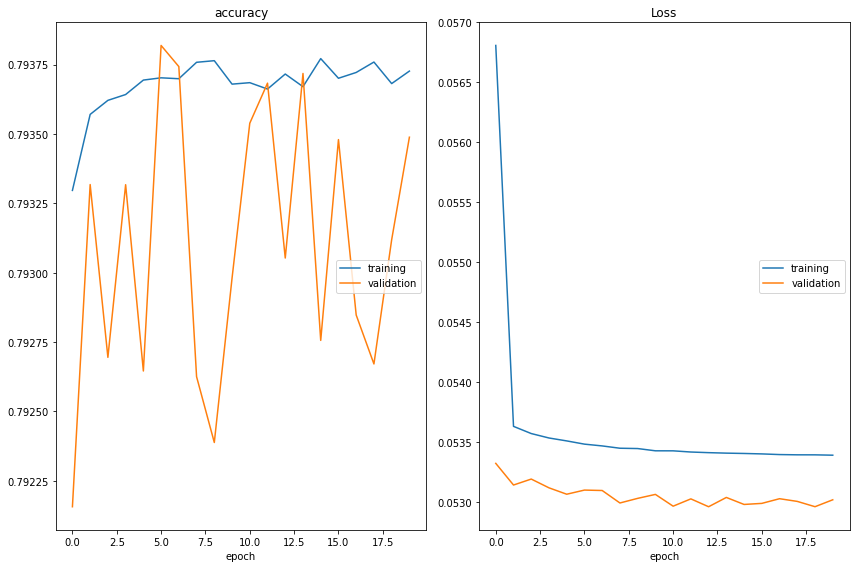

accuracy
	training         	 (min:    0.793, max:    0.794, cur:    0.794)
	validation       	 (min:    0.792, max:    0.794, cur:    0.793)
Loss
	training         	 (min:    0.053, max:    0.057, cur:    0.053)
	validation       	 (min:    0.053, max:    0.053, cur:    0.053)
1072/1072 [==============================] - 4s 4ms/step - loss: 0.0534 - accuracy: 0.7937 - val_loss: 0.0530 - val_accuracy: 0.7935


In [ ]:
decoder_model.fit(target_train, X_train,
          validation_data=(target_test, X_test),
          epochs=20,
          batch_size=56,
          callbacks=[PlotLossesKerasTF()])

In [ ]:
noise_factor = 0.2
test_data = to_categorical(np.arange(10)) + noise_factor * tf.random.normal(shape=(10, 10))

In [ ]:
test_data = to_categorical(np.arange(10))

In [ ]:
data_pred = decoder_model.predict(test_data)

In [ ]:
data_pred.shape

(10, 28, 28, 1)

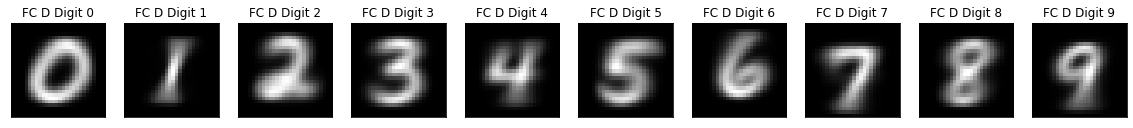

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("FC D Digit " + str(i))
    plt.imshow(tf.squeeze(data_pred[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)